<a href="https://colab.research.google.com/github/ethane66/MSFT-Talent-AI/blob/main/Proyecto_final_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

üìä Tabla de resultados:


Instituto                                             Rese√±a  Polaridad  \
0  Instituto A  Los profesores son excelentes y el ambiente es...       0.00   
1  Instituto A  No me gust√≥ la organizaci√≥n del curso, fue un ...       0.00   
2  Instituto A    Las instalaciones est√°n muy limpias y modernas.       0.00   
3  Instituto A  Todo estuvo perfecto, aprend√≠ mucho y me sent√≠...       0.00   
4  Instituto A  Algunos profesores no se preparaban bien para ...       0.00   
5  Instituto B              Gran atenci√≥n por parte del personal.       0.00   
6  Instituto B  El curso estuvo bien, pero podr√≠a ser m√°s pr√°c...       0.00   
7  Instituto B  Demasiado desorden, no volver√≠a a tomar clases...       0.00   
8  Instituto B   Los horarios no se respetaban y eso fue molesto.       0.00   
9  Instituto B        La experiencia fue muy positiva en general.       0.05   

  Sentimiento  
0     Neutral  
1     Neutral  
2     Neutral  
3     Neutral  
4     Neutral  
5     Neutral  
6     Neutral  
7     Neutral  
8     Neutral  
9    Positiva

üìÅ Archivo guardado: analisis_rese√±as.csv


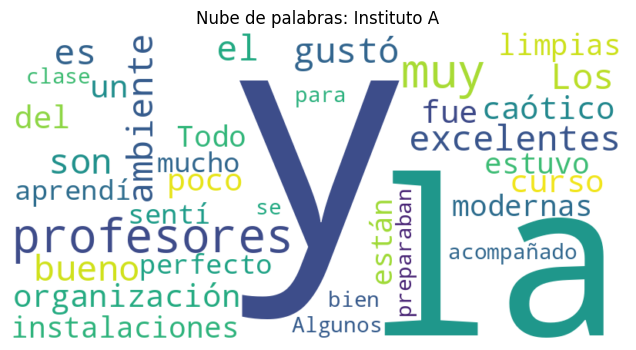

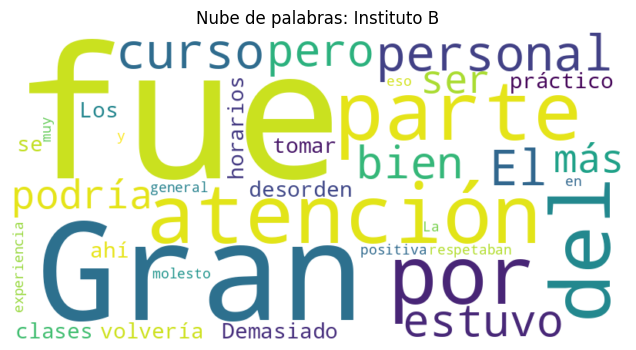


üìà Comparaci√≥n de sentimiento promedio:
Instituto A: 0.00
Instituto B: 0.01

üèÜ Instituto B tiene mejores rese√±as en promedio.


In [2]:
# üì¶ Instalar librer√≠as necesarias
!pip install textblob wordcloud matplotlib pandas

# üìö Importar librer√≠as
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

# üìù Rese√±as de dos institutos (reemplaza estos textos con los reales)
instituto_a = {
    "nombre": "Instituto A",
    "rese√±as": [
        "Los profesores son excelentes y el ambiente es muy bueno.",
        "No me gust√≥ la organizaci√≥n del curso, fue un poco ca√≥tico.",
        "Las instalaciones est√°n muy limpias y modernas.",
        "Todo estuvo perfecto, aprend√≠ mucho y me sent√≠ acompa√±ado.",
        "Algunos profesores no se preparaban bien para la clase.",
    ]
}

instituto_b = {
    "nombre": "Instituto B",
    "rese√±as": [
        "Gran atenci√≥n por parte del personal.",
        "El curso estuvo bien, pero podr√≠a ser m√°s pr√°ctico.",
        "Demasiado desorden, no volver√≠a a tomar clases ah√≠.",
        "Los horarios no se respetaban y eso fue molesto.",
        "La experiencia fue muy positiva en general."
    ]
}

# üîç Funci√≥n para analizar rese√±as
def analizar_rese√±as(instituto):
    resultados = []
    for rese√±a in instituto["rese√±as"]:
        blob = TextBlob(rese√±a)
        polaridad = blob.sentiment.polarity
        clasificacion = "Positiva" if polaridad > 0 else "Negativa" if polaridad < 0 else "Neutral"
        resultados.append({
            "Instituto": instituto["nombre"],
            "Rese√±a": rese√±a,
            "Polaridad": round(polaridad, 2),
            "Sentimiento": clasificacion
        })
    return resultados

# üß† Analizar ambos institutos
resultados_a = analizar_rese√±as(instituto_a)
resultados_b = analizar_rese√±as(instituto_b)

# üßæ Crear DataFrame y mostrarlo
df = pd.DataFrame(resultados_a + resultados_b)
print("üìä Tabla de resultados:")
display(df)

# üíæ Guardar resultados en CSV
df.to_csv("analisis_rese√±as.csv", index=False)
print("üìÅ Archivo guardado: analisis_rese√±as.csv")

# ‚òÅÔ∏è Nube de palabras para cada instituto
def mostrar_nube(instituto):
    texto = " ".join(instituto["rese√±as"])
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(texto)
    plt.figure(figsize=(10, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Nube de palabras: {instituto['nombre']}")
    plt.show()

mostrar_nube(instituto_a)
mostrar_nube(instituto_b)

# üìà Comparar institutos por polaridad promedio
promedio_a = df[df["Instituto"] == instituto_a["nombre"]]["Polaridad"].mean()
promedio_b = df[df["Instituto"] == instituto_b["nombre"]]["Polaridad"].mean()

print("\nüìà Comparaci√≥n de sentimiento promedio:")
print(f"{instituto_a['nombre']}: {promedio_a:.2f}")
print(f"{instituto_b['nombre']}: {promedio_b:.2f}")

if promedio_a > promedio_b:
    print(f"\nüèÜ {instituto_a['nombre']} tiene mejores rese√±as en promedio.")
elif promedio_b > promedio_a:
    print(f"\nüèÜ {instituto_b['nombre']} tiene mejores rese√±as en promedio.")
else:
    print("\n‚öñÔ∏è Ambos institutos tienen rese√±as igual de buenas.")
